# Finding a Pupil in an Image, using OpenCV

FindPupil demonstrates how *OpenCV* can be used to find the pupil in an image
of the eye. This includes ademonstration of a number of important image
processing steps in OpenCV, using Python-CV2.
To run, the file `eye.bmp` is required.

The following steps are included:

- Converting the image to grayscale
- Calculating and showing the histogram
- Interactively setting the threshold for b/w conversion
- Filling holes
- Opening the image
- Fitting an edge to the pupil

Note that when you run this notebook, openCV often opens the video and image windows in the background, and waits for your response!

## Preliminaries

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import cv2


def nothing(*arg):
    ''' A dummy function for the trackbar. '''
    pass

%matplotlib inline

## Load and Show Image

Note here that to read and show the image, I use the commands from Matplolib. For reading the image, there is not much difference. For showing the image, the Matplotlib command shows the image "inline", whereas cv2.imshow creates a named, external window (see below).

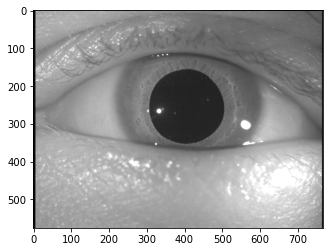

In [11]:
img = plt.imread('data\images\eye.bmp')
# If you want to use the cv2-command for reading in an image, do:
# img = cv2.imread('eye.bmp', cv2.CV_LOAD_IMAGE_GRAYSCALE)
plt.set_cmap('gray')  # Set the colormap to "gray"
plt.imshow(img)

## Show a graylevel histogram

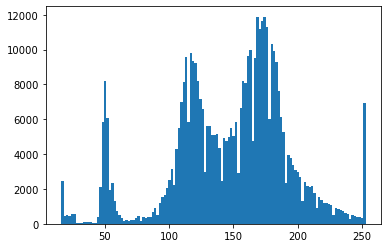

In [12]:
# The "_" is a dummy variable to suppress the output
_ = plt.hist(img.flatten(), 128)

## Thresholding, using "OpenCV"

First, let us simply open an image window in OpenCV. Showing simple images in openCV is more involved, as the command "waitKey" is required to update the image.

**Note:** The following code with generate a OpenCV-window outside this notebook. To close it, press `Esc`

In [13]:
# Showing the same image in an openCV-window is a bit  tricky:
# Note: The following code with generate a OpenCV-window outside this notebook. To close it, press `Esc`

cv2.imshow('demo', img)
while True:
    ch = cv2.waitKey(5)
    if ch == 27:
        cv2.destroyWindow('demo')
        break

Next, let us generate an interactive image, where wen can adjust a parameter for the image processing.

In [14]:
# Set a threshold, for b/w conversion, using a trackbar
cv2.namedWindow('bw')  # First you have to create a named window for OpenCV
cv2.createTrackbar('thr', 'bw', 1, 255, nothing)    # dummy function "nothing" defined below
cv2.setTrackbarPos('thr', 'bw', 85)
while True:
    thrs = cv2.getTrackbarPos('thr', 'bw')
    (thresh, im_bw) = cv2.threshold(img, thrs, 255, cv2.THRESH_BINARY)
    cv2.imshow('bw', im_bw)
    ch = cv2.waitKey(5)
    if ch == 27:
        cv2.destroyWindow('bw')
        break

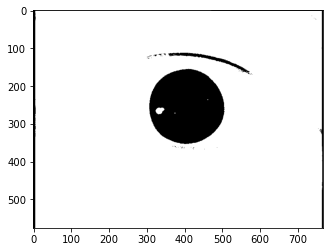

In [15]:
plt.imshow(im_bw)

## Remove black border, Fill holes

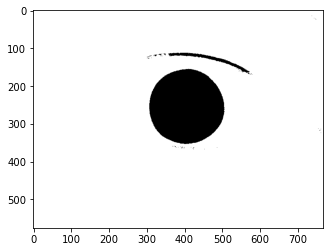

In [16]:
# Remove the black border
h, w = img.shape
mask = np.zeros((h + 2, w + 2), dtype=np.uint8)
cv2.floodFill(im_bw, mask, (1, 1), 255)

# Fill the holes
wHoles = im_bw.copy()
# Note that the mask has to be 2 pixels larger than the image!
mask = np.zeros((h + 2, w + 2), dtype=np.uint8)
cv2.floodFill(wHoles, mask, (1, 1), 0)
im_bw[wHoles == 255] = 0
plt.imshow(im_bw)

## Eliminate Eyelid, by "closing" the image

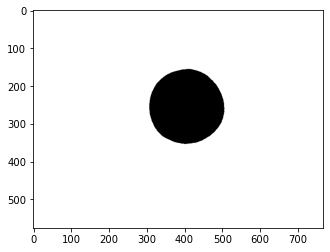

In [17]:
from skimage.morphology import disk
strEl = disk(10)  # structural Element
closed = cv2.morphologyEx(im_bw, cv2.MORPH_CLOSE, strEl)
plt.imshow(closed)

## Edgy Finish

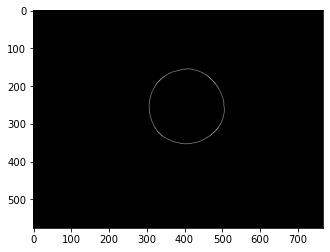

In [18]:
thrs1 = 1000
thrs2 = 1000
edge = cv2.Canny(closed, thrs1, thrs2, apertureSize=5)
plt.imshow(edge)

[ImgProc_3_GanglionCell.ipynb](ImgProc_3_GanglionCell.ipynb)<img src="data/images/Forward_Backward.png" align="middle"> [ImgProc_4b_FindPupil_skimage.ipynb](ImgProc_4b_FindPupil_skimage.ipynb)


    Author: Thomas Haslwanter
    Date: Feb 17, 2023

<img src="data/images/CCA_40.png">

*Image Processing*  is licensed under a Creative Commons Attribution 4.0 International License.